In [95]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [4]:
sp500 = pd.read_csv('/Users/zss/OneDrive - The University of Chicago/DRW_Trading/self_edit/qqq_reg/SP500_daily_2021.csv')

In [6]:
qqq_symbol = pd.read_csv('/Users/zss/OneDrive - The University of Chicago/DRW_Trading/self_edit/qqq_reg/qqq_symbol.csv')

In [37]:
qqq_symbol.loc[101] = 'GOOG'

In [53]:
qqq = sp500[sp500['SYM_ROOT'].isin(qqq_symbol.Symbol)]

In [54]:
qqq = qqq.reset_index()
qqq = qqq.drop('Unnamed: 0', axis=1)
qqq = qqq.drop('index',axis=1)

In [55]:
qqq

,DATE,SYM_ROOT,symbol,CSize,OSize,total_vol_m,total_vol_b,total_vol_a
0,20210104,ADBE,ADBE,428050.0,51735.0,3370248.0,7383.0,235908.0
1,20210104,ADI,ADI,417462.0,23304.0,2396833.0,5064.0,95352.0
2,20210104,ADP,ADP,388601.0,29201.0,1919053.0,1144.0,346848.0
3,20210104,ADSK,ADSK,176577.0,23054.0,1268950.0,8092.0,130183.0
4,20210104,AEP,AEP,678559.0,25175.0,2679832.0,907.0,552394.0
...,...,...,...,...,...,...,...,...
19185,20211231,VRSK,VRSK,150317.0,2303.0,479632.0,NaN,183208.0
19186,20211231,VRSN,VRSN,107316.0,2265.0,328002.0,86.0,17520.0
19187,20211231,VRTX,VRTX,277768.0,9574.0,1114297.0,423.0,27562.0
19188,20211231,WBA,WBA,608294.0,34251.0,3141904.0,1492.0,263472.0


In [43]:
symbol_lst = list(qqq.SYM_ROOT.unique())

In [44]:
qqq.dtypes

DATE             int64
SYM_ROOT        object
symbol          object
CSize          float64
OSize          float64
total_vol_m    float64
total_vol_b    float64
total_vol_a    float64
dtype: object

In [58]:
# tring to change the date to index
qqq.index = pd.to_datetime(qqq['DATE'],format='%Y%m%d')
qqq.drop('DATE',axis=1,inplace=True)
qqq

,SYM_ROOT,symbol,CSize,OSize,total_vol_m,total_vol_b,total_vol_a
DATE,,,,,,,
2021-01-04,ADBE,ADBE,428050.0,51735.0,3370248.0,7383.0,235908.0
2021-01-04,ADI,ADI,417462.0,23304.0,2396833.0,5064.0,95352.0
2021-01-04,ADP,ADP,388601.0,29201.0,1919053.0,1144.0,346848.0
2021-01-04,ADSK,ADSK,176577.0,23054.0,1268950.0,8092.0,130183.0
2021-01-04,AEP,AEP,678559.0,25175.0,2679832.0,907.0,552394.0
...,...,...,...,...,...,...,...
2021-12-31,VRSK,VRSK,150317.0,2303.0,479632.0,NaN,183208.0
2021-12-31,VRSN,VRSN,107316.0,2265.0,328002.0,86.0,17520.0
2021-12-31,VRTX,VRTX,277768.0,9574.0,1114297.0,423.0,27562.0


In [115]:
qqq.index.unique()[-70:]

DatetimeIndex(['2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-11-01',
               '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
               '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
               '2021-11-12', '2021-11-15', '2021-11-16', '2021-11-17',
               '2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-26', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-06',
               '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
      

In [77]:
def get_stock(df, name):
    mask = df['SYM_ROOT'].str.contains(name)
    df['20days_AM'] = None
    df.loc[mask,'20days_AM'] = df[mask]['total_vol_m'].rolling(20).mean()
    df['log_20days_AM'] = None
    df.loc[mask, 'log_20days_AM'] = (np.log(df[mask]['total_vol_m'])).shift().rolling(20).mean()
    df['log_total_vol'] = None
    df.loc[mask,'log_total_vol'] = np.log(df[mask]['total_vol_m'])
    df = df[mask][20:]
    return df

In [78]:
def split_data(df):
    n = int(len(df) * 0.7)
    train = df[:n]
    test = df[n:]
    return train, test

In [88]:
def ARMA_function(train, test, name):
    train_vol = train['log_total_vol'].values
    test_vol = test['log_total_vol'].values
    history = [x for x in train_vol]
    predictions = list()
    model_fit_dict[name] = {}
    error_perc = []
    for t in range(len(test_vol)):
        model = sm.tsa.arima.ARIMA(history, order=(1,0,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat) #the predictions
        obs = test_vol[t]
        history.append(obs) #ground truths
        error = (obs - yhat)/obs # metrics (v-vhat)/v
        error_perc.append(error)
    model_fit_dict[name]['predictions'] = predictions
    model_fit_dict[name]['history'] = history
    return error_perc

In [97]:
#this for-loop will take roughly 10 minutes to save 74 stocks in the dictionary
#the dict is here just to make following steps processing more easily
model_fit_dict = {}
for symbol in symbol_lst:
    train, test = split_data(get_stock(qqq, symbol))
    error_perc = ARMA_function(train, test, symbol)
    model_fit_dict[symbol]['error_perc'] = error_perc


In [240]:
import json

In [241]:
with open('arma_ml_qqq_dict.json', 'w') as fp:
    json.dump(model_fit_dict, fp)

In [ ]:
#just EDA 
error_dict = {}
for symbol in symbol_lst:
    error_dict[symbol] = model_fit_dict[symbol]['error_perc']
error_df = pd.DataFrame.from_dict(error_dict,orient ='index')
error_df = error_df.dropna(axis=1)
error_df

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
ADBE,-0.009829,-0.010770,0.024879,0.030671,-0.024785,-0.008647,0.002869,0.023815,-0.023134,-0.022365,...,0.019687,-0.049828,-0.000064,0.011988,-0.046103,-0.022188,-0.008248,0.008411,-0.025481,-0.016710
ADI,-0.002658,-0.022909,0.021702,0.024704,-0.015861,-0.003161,0.000077,-0.003848,-0.014378,-0.002253,...,0.039973,-0.017790,-0.018446,-0.038157,-0.012526,-0.006530,-0.026002,-0.015961,-0.017438,-0.001860
ADP,-0.020159,-0.029226,-0.006435,-0.000056,-0.017925,0.023336,0.000029,0.003723,-0.020887,0.008495,...,0.027302,-0.024557,-0.020647,-0.001369,0.010743,-0.035324,-0.023197,-0.021107,-0.032357,-0.015488
ADSK,0.002749,-0.000249,0.028027,0.024425,-0.015846,0.018617,-0.009813,0.023932,-0.033958,-0.016527,...,0.029617,-0.011074,-0.028599,-0.022285,-0.001494,-0.035367,-0.022664,-0.033546,-0.004895,-0.016156
AEP,-0.013610,0.002294,0.005123,0.021079,-0.018080,0.007981,0.012284,0.014586,-0.005738,-0.004353,...,0.035422,-0.018433,0.003112,-0.031757,-0.028905,-0.019065,-0.018755,-0.035913,-0.023881,-0.009213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRSK,0.023612,-0.039717,-0.014312,0.063461,-0.006456,-0.028245,-0.000517,0.015451,-0.017048,-0.012999,...,0.036159,-0.024826,-0.042356,-0.044231,-0.014594,-0.022417,-0.032414,-0.048766,-0.019321,0.020764
VRSN,-0.013695,-0.034058,-0.001238,0.032096,-0.038591,0.004610,-0.020032,0.034572,-0.039080,0.028405,...,0.092205,-0.034550,-0.029901,-0.014063,-0.038516,-0.025210,0.001221,-0.025615,-0.044589,0.004369
VRTX,-0.019241,-0.008151,0.007558,0.003392,-0.023631,-0.003291,-0.003074,0.010041,0.002871,-0.004894,...,0.055041,-0.038542,0.001513,-0.018068,-0.020547,0.024525,-0.058898,-0.039143,-0.022505,0.008663
WBA,-0.026846,-0.008076,0.028909,0.002679,0.000462,0.012264,-0.005390,0.002814,-0.011444,-0.001290,...,0.030480,-0.026189,0.005128,-0.007414,-0.033448,0.000028,-0.015027,0.007403,-0.022056,-0.018955


In [195]:
#just EDA 
#len(model_fit_dict[symbol]['error_perc']) = 70
error_df.columns = qqq.index.unique()[-70:]
error_df.index.name = 'symbol'
error_df

DATE,2021-09-23,2021-09-24,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-04,2021-10-05,2021-10-06,...,2021-12-17,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
symbol,,,,,,,,,,,,,,,,,,,,,
ADBE,-0.009829,-0.010770,0.024879,0.030671,-0.024785,-0.008647,0.002869,0.023815,-0.023134,-0.022365,...,0.019687,-0.049828,-0.000064,0.011988,-0.046103,-0.022188,-0.008248,0.008411,-0.025481,-0.016710
ADI,-0.002658,-0.022909,0.021702,0.024704,-0.015861,-0.003161,0.000077,-0.003848,-0.014378,-0.002253,...,0.039973,-0.017790,-0.018446,-0.038157,-0.012526,-0.006530,-0.026002,-0.015961,-0.017438,-0.001860
ADP,-0.020159,-0.029226,-0.006435,-0.000056,-0.017925,0.023336,0.000029,0.003723,-0.020887,0.008495,...,0.027302,-0.024557,-0.020647,-0.001369,0.010743,-0.035324,-0.023197,-0.021107,-0.032357,-0.015488
ADSK,0.002749,-0.000249,0.028027,0.024425,-0.015846,0.018617,-0.009813,0.023932,-0.033958,-0.016527,...,0.029617,-0.011074,-0.028599,-0.022285,-0.001494,-0.035367,-0.022664,-0.033546,-0.004895,-0.016156
AEP,-0.013610,0.002294,0.005123,0.021079,-0.018080,0.007981,0.012284,0.014586,-0.005738,-0.004353,...,0.035422,-0.018433,0.003112,-0.031757,-0.028905,-0.019065,-0.018755,-0.035913,-0.023881,-0.009213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRSK,0.023612,-0.039717,-0.014312,0.063461,-0.006456,-0.028245,-0.000517,0.015451,-0.017048,-0.012999,...,0.036159,-0.024826,-0.042356,-0.044231,-0.014594,-0.022417,-0.032414,-0.048766,-0.019321,0.020764
VRSN,-0.013695,-0.034058,-0.001238,0.032096,-0.038591,0.004610,-0.020032,0.034572,-0.039080,0.028405,...,0.092205,-0.034550,-0.029901,-0.014063,-0.038516,-0.025210,0.001221,-0.025615,-0.044589,0.004369
VRTX,-0.019241,-0.008151,0.007558,0.003392,-0.023631,-0.003291,-0.003074,0.010041,0.002871,-0.004894,...,0.055041,-0.038542,0.001513,-0.018068,-0.020547,0.024525,-0.058898,-0.039143,-0.022505,0.008663


In [211]:
model_fit_dict.keys()

dict_keys(['ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'ATVI', 'AVGO', 'BIIB', 'BKNG', 'CDNS', 'CHTR', 'COST', 'CPRT', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'DLTR', 'DXCM', 'EA', 'EBAY', 'EXC', 'FAST', 'FB', 'FISV', 'FTNT', 'GILD', 'GOOG', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KHC', 'KLAC', 'LRCX', 'MAR', 'MCHP', 'MDLZ', 'MNST', 'MRNA', 'MSFT', 'MTCH', 'MU', 'NFLX', 'NVDA', 'NXPI', 'ODFL', 'ORLY', 'PAYX', 'PCAR', 'PEP', 'PYPL', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SNPS', 'SWKS', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRSN', 'VRTX', 'WBA', 'XEL'])

In [223]:
error_perc_dict = {}
for name in model_fit_dict.keys():
    error_perc_dict[name] = model_fit_dict[name]['error_perc']

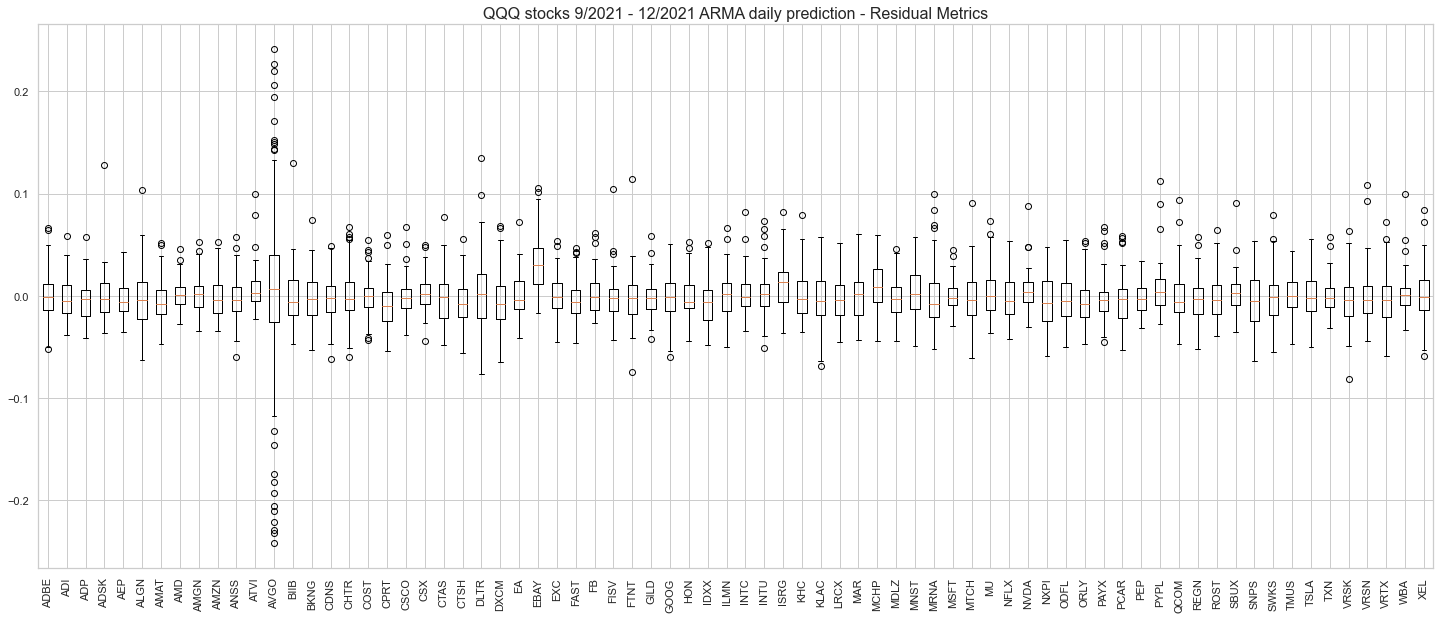

In [235]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.boxplot(error_perc_dict.values())
ax.set_xticklabels(error_perc_dict.keys())
plt.xticks(rotation = 90)
plt.title("QQQ stocks 9/2021 - 12/2021 ARMA daily prediction - Residual Metrics", fontsize=16)
plt.show()
fig.savefig("arma_2021_qqq.png")

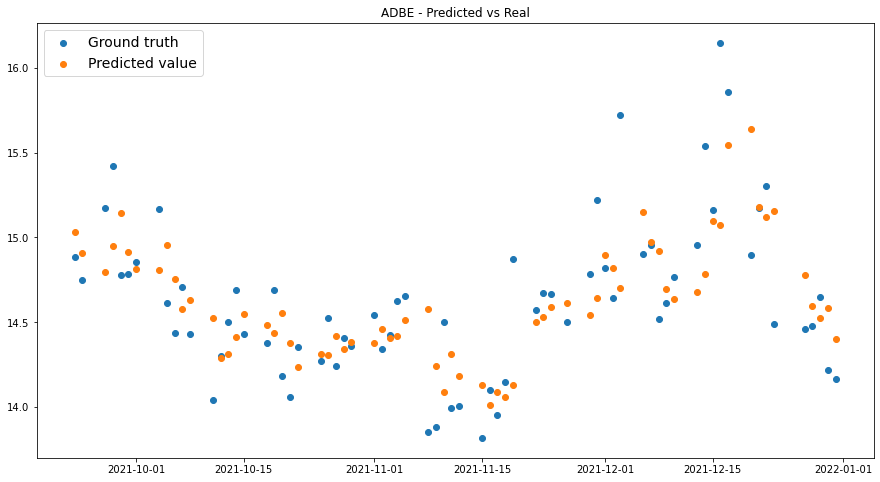

In [139]:
plt.rcParams.update({'figure.figsize':(15,8)})
plt.scatter(qqq.index.unique()[-70:], model_fit_dict['ADBE']['history'][-70:])
plt.scatter(qqq.index.unique()[-70:], model_fit_dict['ADBE']['predictions'])
#plt.plot(qqq.index.unique()[-70:], model_fit_dict['ADBE']['error_perc'])
#plt.plot(qqq.index.unique()[-70:], model_fit_dict['ADBE']['error_perc'])
#plt.title('ADBE - metrics (v-vhat)/v')
plt.title('ADBE - Predicted vs Real')
plt.legend(['Ground truth', 'Predicted value'], prop={'size': 14})
plt.show()

In [155]:
model = sm.tsa.arima.ARIMA(model_fit_dict['ADBE']['history'], order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  232
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -37.774
Date:                Thu, 07 Apr 2022   AIC                             83.548
Time:                        18:10:19   BIC                             97.335
Sample:                             0   HQIC                            89.108
                                - 232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4903      0.112    129.482      0.000      14.271      14.710
ar.L1          0.8934      0.041     21.832      0.000       0.813       0.974
ma.L1         -0.4182      0.093     -4.486      0.0

# ARMA Customize

In [306]:
importlib.reload(qqq_module1)

<module 'qqq_module1' from '/Users/zss/OneDrive - The University of Chicago/DRW_Trading/self_edit/ARMA/qqq_module1.py'>

In [307]:
import qqq_module1

#### Testify the code

In [308]:
check = get_stock(qqq, 'QCOM')

In [309]:
arma1 = qqq_module1.customized_ARMA(check,0.7)

In [310]:
arma1.metrics

DATE
2021-10-01    0.100289
2021-10-04    0.203359
2021-10-05    0.190155
2021-10-06   -0.129945
2021-10-07    0.085695
                ...   
2021-12-27   -0.354271
2021-12-28   -0.244304
2021-12-29   -0.336797
2021-12-30   -0.522557
2021-12-31   -0.272909
Length: 64, dtype: float64

In [321]:
arma_error_dict = {}
for symbol in symbol_lst:
    data = get_stock(qqq, symbol)
    error_perc = qqq_module1.customized_ARMA(data,0.7).metrics
    arma_error_dict[symbol] = error_perc.values

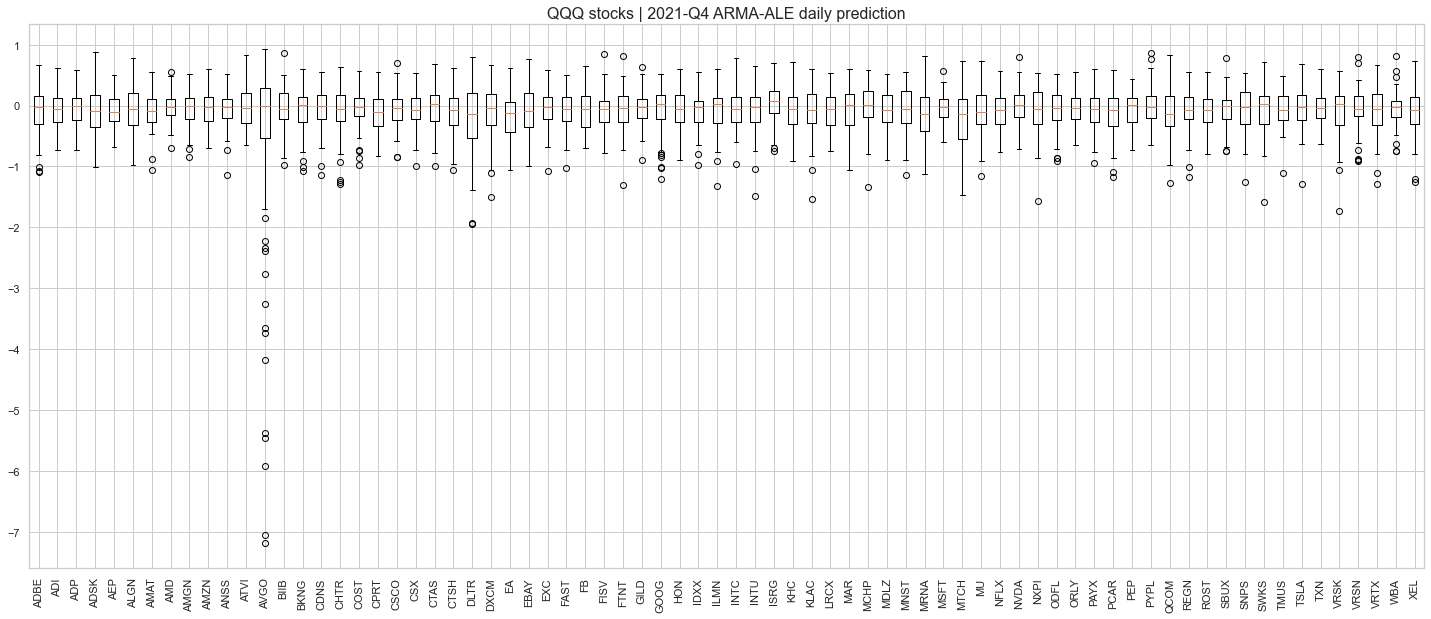

In [325]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.boxplot(arma_error_dict.values())
ax.set_xticklabels(error_perc_dict.keys())
plt.xticks(rotation = 90)
plt.title("QQQ stocks | 2021-Q4 ARMA-ALE daily prediction", fontsize=16)
plt.show()
fig.savefig("arma_ALE_qqq.png")